In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from country_codes import eurostat_dictionary
import eurostat
import matplotlib.pyplot as plt
from dowhy.causal_identifier import backdoor
import networkx as nx
from pgmpy.estimators import PC
from pgmpy.models import BayesianModel

from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
file_path = 'data/df_outcome_2010.csv'
df_outcome_2010 = pd.read_csv(file_path)
df_outcome_2010.head()

,country,age,wstatus,2010,unemployment_rate_age_group,youth_getting_married,rent_price_index,inflation_index,minimum_wage_PC_mean_income,mobile_students_from_abroad,PC_eating_fruit,Regulated rental dwellings (%),average_student_debt,total_student_debt_NL,gemiddelde_verkoopprijs_woning,mother_age_at_birth,hh_avg_children
0,Netherlands,Y18-24,EDUC,54.6,10.8,16750.0,85.81,92.05,44.2,195522.0,17.9,"37,12",8100.0,9.500000e+09,239.53,30.510247,0.464366
1,Netherlands,Y18-34,EDUC,49.0,5.9,81445.0,85.81,92.05,44.2,195522.0,NaN,"37,12",12850.0,9.500000e+09,239.53,30.510247,0.464366
2,Netherlands,Y25-34,EDUC,13.3,3.7,64695.0,85.81,92.05,44.2,195522.0,NaN,"37,12",16250.0,9.500000e+09,239.53,30.510247,0.464366
3,Netherlands,Y18-24,EMP_FT,23.7,10.8,16750.0,85.81,92.05,44.2,195522.0,17.9,"37,12",8100.0,9.500000e+09,239.53,30.510247,0.464366
4,Netherlands,Y18-34,EMP_FT,28.5,5.9,81445.0,85.81,92.05,44.2,195522.0,NaN,"37,12",12850.0,9.500000e+09,239.53,30.510247,0.464366


  0%|          | 0/5 [00:00<?, ?it/s]

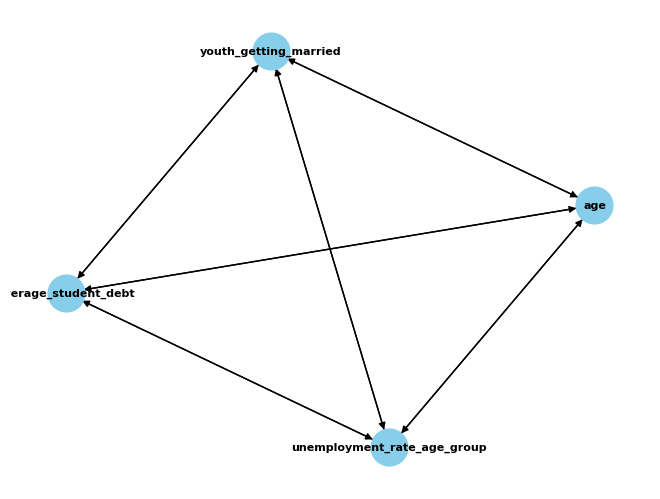

In [10]:
selected_variables = df_outcome_2010.columns

# Create a subset of the DataFrame with the selected variables
df_subset = df_outcome_2010[selected_variables]

# PC algorithm to get the graph
pc = PC(data=df_subset)
skeleton, separating_sets = pc.build_skeleton()
model = pc.skeleton_to_pdag(skeleton, separating_sets)
# model = pc.pdag_to_dag(dag)

# visualize discovered causal graph
G = nx.DiGraph()
G.add_nodes_from(model.nodes())
G.add_edges_from(model.edges())

# drawing
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, node_size=700, node_color='skyblue', font_color='black', font_weight='bold', arrowsize=10)
plt.show()